### `themachinethatgoesping` tutorial series
# Tutorial 1: Introduction

In this tutorial, we use `themachinethatgoesping` to access the coordinates (latitude/longitude) of all pings in a given dataset. 

This short sequence illustrates a few core objects of the `themachinethatgoesping`, and how to use them to load and access data.

`themachinethatgoesping` concepts covered:
- finding .all/.wcd files
- data loading
- "File Handler" object
- "Ping Container" object
- "Ping" object
- "Ping Location" object


## Summary

Found 288 files
indexing files ⡀ 100% :06s<00m:00s] [..1_181812_Belgica.wcd (288/288)]                                  
indexing files ⠄ 100% :06s<00m:00s] [Found: 5130471 datagrams in 288 files (25571MB)]                                                 
Initializing navigation ⢀ 96% :03s<00m:00s] [141/144]                   
Initializing ping interface ⠂ 99% :10s<00m:00s] [Done]                                              


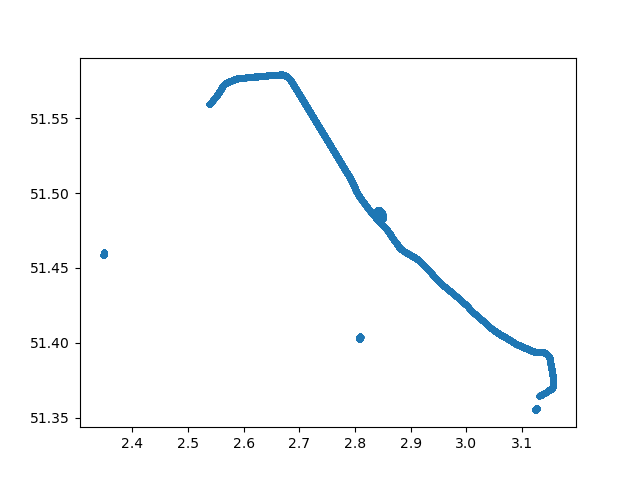

In [6]:
%matplotlib widget
import os

from matplotlib import pyplot as plt
from themachinethatgoesping.echosounders import index_functions
from themachinethatgoesping.echosounders import kongsbergall

folders = []
folders.append("../unittest_data")
folders = ['/home/data/turbeams/TURBEAMS_data_crunshing/campaigns/TURBEAMS_December_2023_25']
folders = ['/home/data/turbeams/TURBEAMS_data_crunshing/campaigns/TURBEAMS_April_2023/']

# list raw data files
files = index_functions.find_files(folders, [".all","wcd"])
files.sort()

# load files' data
fh = kongsbergall.KongsbergAllFileHandler(files)

# get pings' coordinates
lat, lon = [], []
for ping in fh.get_pings():
    pingLocation = ping.get_geolocation()
    lat.append(pingLocation.latitude) 
    lon.append(pingLocation.longitude)

# plot coordinates of all pings in dataset
plt.figure()
plt.plot(lon, lat, '.')

In [5]:
import themachinethatgoesping as Ping
Ping.pingprocessing.core.clear_memory()

## Step-by-step
### 1. List raw data files

In [ ]:
# define a list of folder(s) to search for raw data files
# notes: 
#   - subdirectories will be searched as well
#   - you can add multiple folders by appending them to the list
#   - pair of files (e.g. .all and .wcd) don't have to be in the same folder
folders = []
folders.append("../unittest_data")

# find all Kongsberg files in the list of folders
from themachinethatgoesping.echosounders import index_functions
files = index_functions.find_files(folders, [".all","wcd"])

In [ ]:
# show files found
print(f"The output is a {type(files)} object with {len(files)} elements:")
files.sort()
for i, file in enumerate(files):
    print(f"({i}/{len(files)}) {file}")

### 2. Load files' data

In [ ]:
# load the data with:
from themachinethatgoesping.echosounders import kongsbergall
fh = kongsbergall.KongsbergAllFileHandler(files)
print("\n")

# the output is a "File Handler" object. 
print(f"A File Handler is a {type(fh)} object.\n")

# a File Handler manages the entire dataset.

# print a summary of the File Handler's contents
print(fh)

# notes:
#   - it is initalized with the list of files
#   - the cache file paths are optional but recommended
#   - File pairs will be grouped together at this stage

### 3. Accessing data

In [ ]:
# the pings data are obtained from the File Handler with:
pc = fh.get_pings()

# the output is a "Ping Container" object
print(f"A Ping Container is a {type(pc)} object.\n")

# print a summary of the Ping Container's contents
print(pc)

In [ ]:
# access pings in a Ping Container by indexing
examplePing = pc[42]

# the output is a "Ping" object
print(f"A Ping is a {type(examplePing)} object.\n")

# print a summary of the Ping's contents
print(examplePing)

In [ ]:
# a Ping has 3 types of information: base, bottom, and water-column.
# base information includes location
examplePingLocation = examplePing.get_geolocation()

# the output is a "Ping Location" object
print(f"A Ping Location is a {type(examplePingLocation)} object.\n")

# print a summary of the Ping Location's contents
print(examplePingLocation)

In [ ]:
# get the latitude and longitude of the ping from the Ping Location
lat, long = examplePingLocation.latitude, examplePingLocation.longitude
print(f"Example ping location - Latitude: {lat}, Longitude: {long}")

In [ ]:
# get pings' coordinates of all pings
lat, lon = [], []
for ping in fh.get_pings():
    pingLocation = ping.get_geolocation()
    lat.append(pingLocation.latitude) 
    lon.append(pingLocation.longitude)

# plot coordinates of all pings in dataset
plt.figure()
plt.plot(lon, lat, '.')